# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.7 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 68.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080019 sha256=01fd3a94e83f7bf7e885a2585e020eb6d7e3c6656c2c039b438b50a95e97b395
  Stored in directory: /root/.cache/pip/wheels/be/b4/d8/7ce778fd6e637bea03a561223a77ba6649aff8168e3c613754
Successfully built bokeh
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.4.3
    Uninstalling bokeh-2.4.3:
      Successfully uninstalled bokeh-2.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. 

### Setup Kaggle API Key

In [2]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "srijaarumalla"
kaggle_key = "39b7ca4481c234adeab5216005e4e4d2"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the [bike sharing demand competition](https://www.kaggle.com/c/bike-sharing-demand) and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [4]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 53.8MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [5]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [6]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv",parse_dates=["datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [8]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv",parse_dates=["datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [9]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv",parse_dates=["datetime"])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are predicting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [40]:
predictor = TabularPredictor(label="count",problem_type='regression',eval_metric="root_mean_squared_error",
learner_kwargs={"ignored_columns": ["casual", "registered"]}).fit(train_data=train,
time_limit=600, 
presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230530_000458/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230530_000458/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 15
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10944.35 MB
	Train Data (Original)  Memory Usage: 0.98 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the featur

### Review AutoGluon's training run with ranking of models that did the best.

In [41]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.436946      43.453215  582.150099                0.000950           0.283973            3       True         13
1          LightGBM_BAG_L2  -30.631053      40.812226  430.689790                0.578804          43.994981            2       True         10
2        LightGBMXT_BAG_L2  -31.212164      41.844875  435.703045                1.611453          49.008236            2       True          9
3   RandomForestMSE_BAG_L2  -31.747166      40.932934  439.673500                0.699512          52.978691            2       True         11
4      WeightedEnsemble_L2  -32.269960      38.937961  369.747148                0.001615           0.745531            2       True          8
5          CatBoost_BAG_L2  -32.751464      40.562496  435.884218         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.34599701170154,
  'LightGBM_BAG_L1': -33.91733862651761,
  'RandomForestMSE_BAG_L1': -38.30612025079756,
  'CatBoost_BAG_L1': -35.688347011217914,
  'ExtraTrees

In [42]:
lb_df = pd.DataFrame(predictor.leaderboard(silent=True))
lb_df

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-30.436946,43.453215,582.150099,0.000950,0.283973,3,True,13
1,LightGBM_BAG_L2,-30.631053,40.812226,430.689790,0.578804,43.994981,2,True,10
2,LightGBMXT_BAG_L2,-31.212164,41.844875,435.703045,1.611453,49.008236,2,True,9
3,RandomForestMSE_BAG_L2,-31.747166,40.932934,439.673500,0.699512,52.978691,2,True,11
4,WeightedEnsemble_L2,-32.269960,38.937961,369.747148,0.001615,0.745531,2,True,8
5,CatBoost_BAG_L2,-32.751464,40.562496,435.884218,0.329074,49.189409,2,True,12
6,LightGBM_BAG_L1,-33.917339,4.657982,66.179179,4.657982,66.179179,1,True,4
7,LightGBMXT_BAG_L1,-34.345997,32.674835,142.927883,32.674835,142.927883,1,True,3
8,CatBoost_BAG_L1,-35.688347,0.461470,136.602645,0.461470,136.602645,1,True,6
9,RandomForestMSE_BAG_L1,-38.306120,1.041523,23.212414,1.041523,23.212414,1,True,5


### Create predictions from test dataset

In [43]:
predictions = predictor.predict(test)
predictions.head()

0    15.536628
1    10.848231
2     9.790624
3     8.638122
4     7.810686
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [44]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      164.493729
std       146.950348
min         3.506394
25%        49.039925
50%       125.602325
75%       234.003998
max       817.501465
Name: count, dtype: float64

In [45]:
# How many negative values do we have?
predictions[predictions<0]

Series([], Name: count, dtype: float32)

In [46]:
# Set them to zero
predictions[predictions<0]=0

### Set predictions to submission dataframe, save, and submit

In [47]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [48]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 316kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [50]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2023-05-30 00:19:56  first raw submission               complete  0.60933      0.60933       
submission_new_hpo.csv       2023-05-30 00:03:11  new features with hyperparameters  complete  0.73541      0.73541       
submission_new_features.csv  2023-05-30 00:02:49  new features                       complete  0.61815      0.61815       
submission.csv               2023-05-30 00:02:21  first raw submission               complete  1.80528      1.80528       


#### Initial score of 1.80528

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

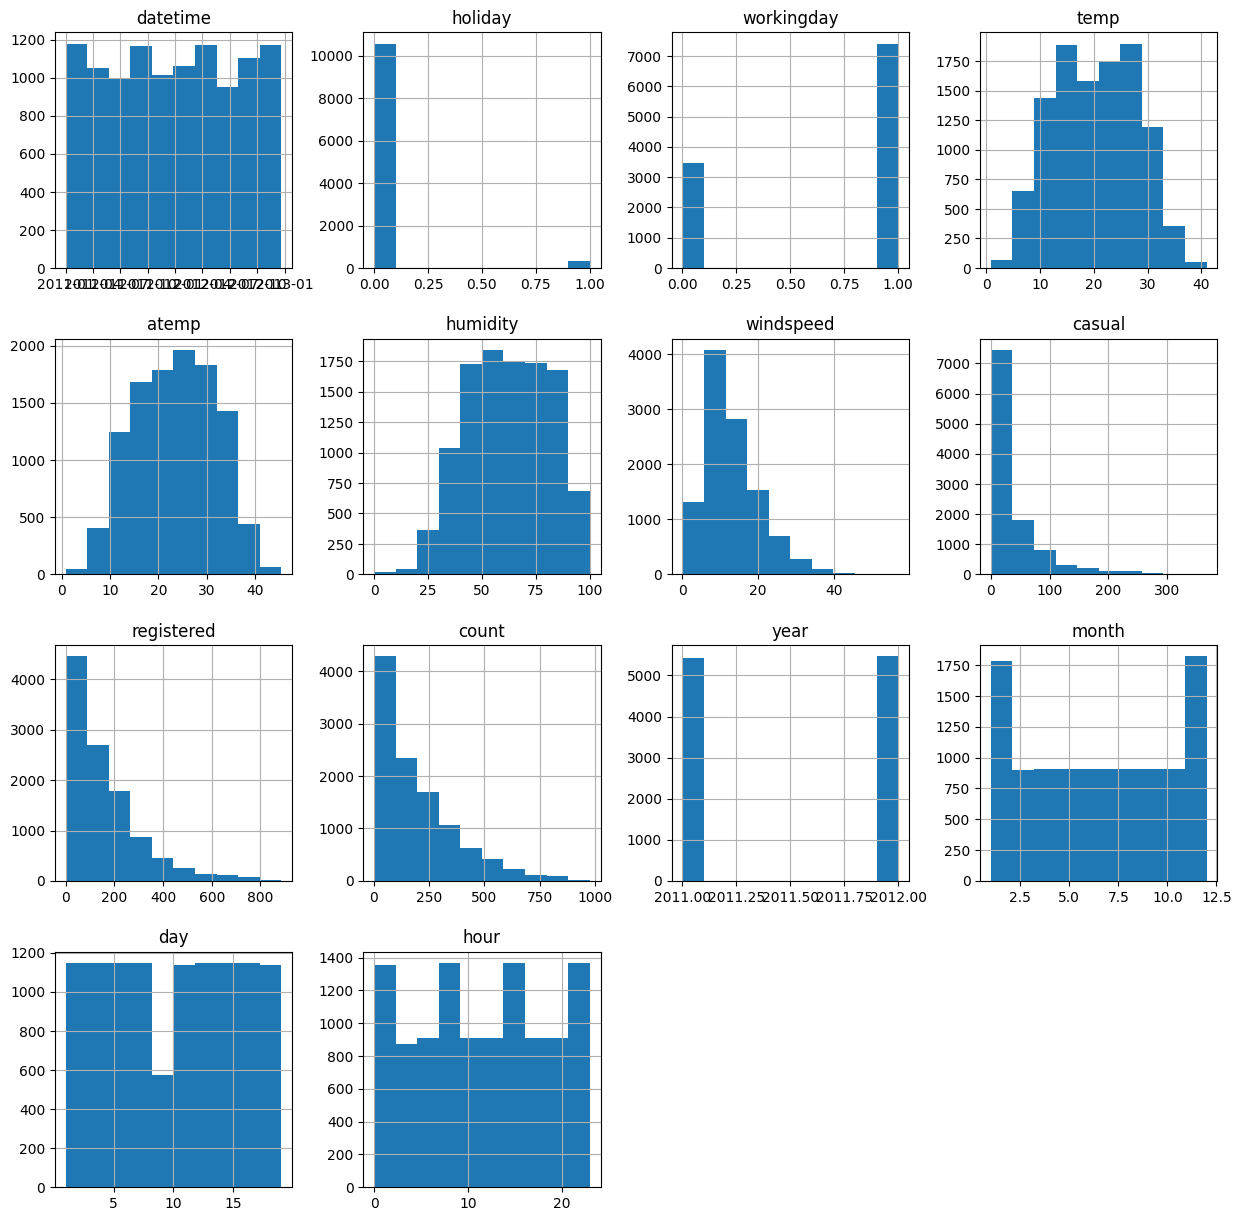

In [51]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(15,15))

In [52]:
# create a new feature
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour


test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [53]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [54]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

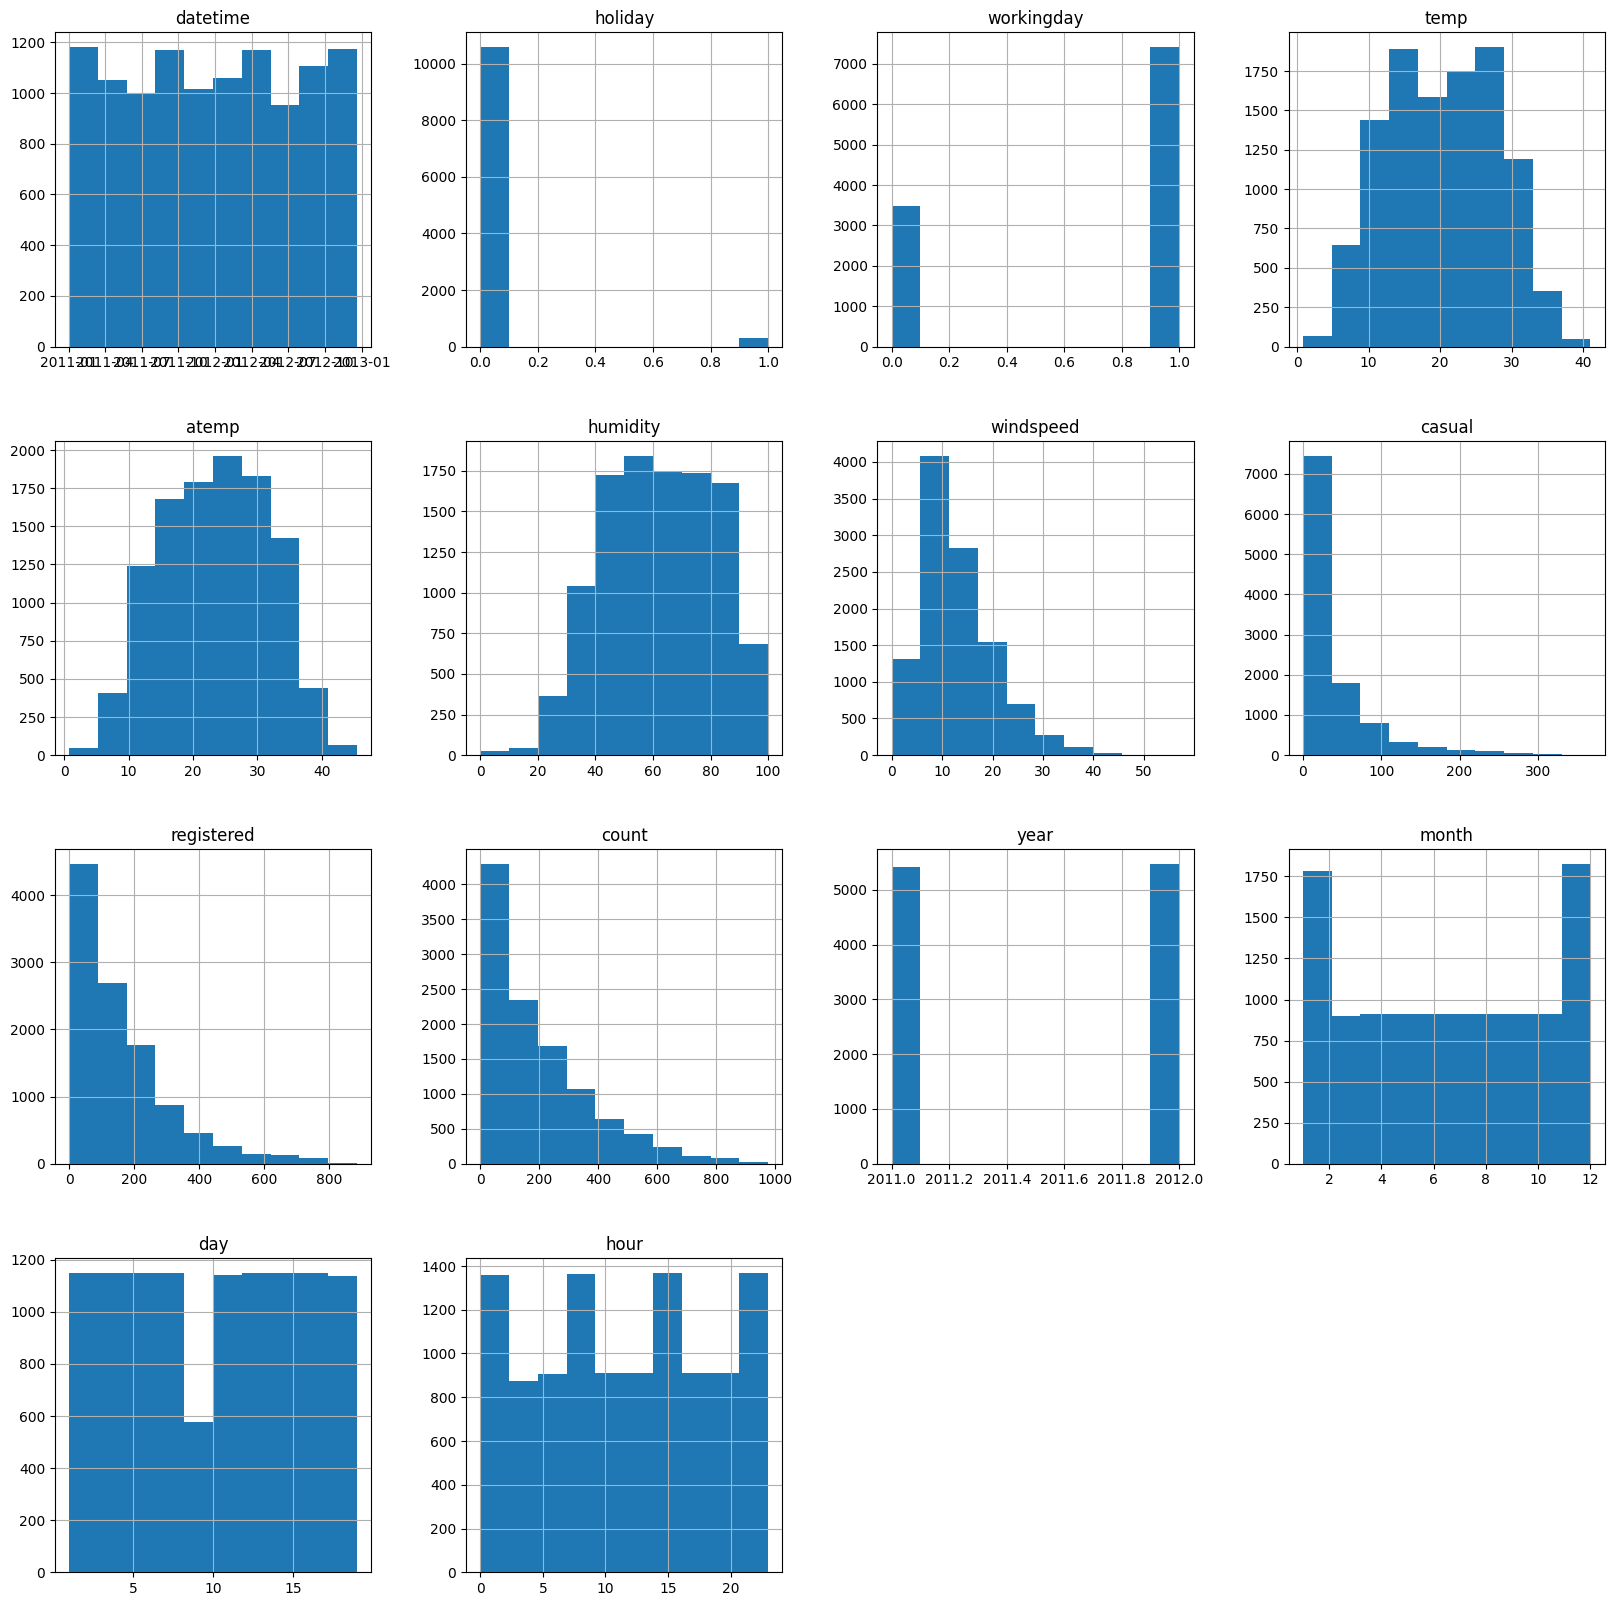

In [55]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(20,20))

## Step 5: Rerun the model with the same settings as before, just with more features

In [56]:
predictor_n_features = TabularPredictor(label="count",problem_type='regression', eval_metric="root_mean_squared_error",learner_kwargs={"ignored_columns": 
["casual", "registered"]}).fit(train_data=train, time_limit=600, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230530_002118/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230530_002118/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 15
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10822.22 MB
	Train Data (Original)  Memory Usage: 0.98 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the featur

In [57]:
predictor_n_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.332326      45.687290  571.443084                0.001268           0.456734            3       True         12
1          LightGBM_BAG_L2  -30.548540      42.884660  423.739585                0.677528          46.367375            2       True          9
2        LightGBMXT_BAG_L2  -31.216177      43.798992  425.587352                1.591860          48.215141            2       True          8
3          CatBoost_BAG_L2  -31.311467      42.576734  426.528601                0.369602          49.156390            2       True         11
4   RandomForestMSE_BAG_L2  -31.693799      43.047033  427.247444                0.839900          49.875234            2       True         10
5      WeightedEnsemble_L2  -32.270916      42.160896  377.929235         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.34599701170154,
  'LightGBM_BAG_L1': -33.91733862651761,
  'RandomForestMSE_BAG_L1': -38.30612025079756,
  'CatBoost_BAG_L1': -35.71847128567597,
  'WeightedEnsemble_L2': -32.270915975386856,
  'LightGBMXT_BAG_L2'

In [58]:
lb_nf_df = pd.DataFrame(predictor_n_features.leaderboard(silent=True))
lb_nf_df

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-30.332326,45.687290,571.443084,0.001268,0.456734,3,True,12
1,LightGBM_BAG_L2,-30.548540,42.884660,423.739585,0.677528,46.367375,2,True,9
2,LightGBMXT_BAG_L2,-31.216177,43.798992,425.587352,1.591860,48.215141,2,True,8
3,CatBoost_BAG_L2,-31.311467,42.576734,426.528601,0.369602,49.156390,2,True,11
4,RandomForestMSE_BAG_L2,-31.693799,43.047033,427.247444,0.839900,49.875234,2,True,10
5,WeightedEnsemble_L2,-32.270916,42.160896,377.929235,0.001694,0.600991,2,True,7
6,LightGBM_BAG_L1,-33.917339,4.838211,64.753031,4.838211,64.753031,1,True,4
7,LightGBMXT_BAG_L1,-34.345997,35.885840,150.767855,35.885840,150.767855,1,True,3
8,CatBoost_BAG_L1,-35.718471,0.405315,138.615457,0.405315,138.615457,1,True,6
9,RandomForestMSE_BAG_L1,-38.306120,0.980292,23.147839,0.980292,23.147839,1,True,5


In [64]:
# Remember to set all negative values to zero
n_predictions = predictor_n_features.predict(test)
n_predictions[n_predictions<0] = 0

In [65]:
# Same submitting predictions
submission_new_features = pd.read_csv("sampleSubmission.csv", parse_dates=["datetime"])
submission_new_features["count"] = n_predictions
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [66]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:00<00:00, 366kB/s]
Successfully submitted to Bike Sharing Demand

In [69]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2023-05-30 00:35:57  new features                       complete  0.62648      0.62648       
submission_new_features.csv  2023-05-30 00:33:34  new features                       complete  0.62648      0.62648       
submission.csv               2023-05-30 00:19:56  first raw submission               complete  0.60933      0.60933       
submission_new_hpo.csv       2023-05-30 00:03:11  new features with hyperparameters  complete  0.73541      0.73541       


#### New Score of 0.61815

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [70]:
import autogluon.core as ag


nn_options = {'num_epochs': 10, 
              'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  
              'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  
              'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1)}

gbm_options = [{'extra_trees': True, 
                'num_boost_round': ag.space.Int(lower=100, upper=500, default=100),
                'num_leaves': ag.space.Int(lower=26, upper=66, default=36)}]









hp = {  'GBM': gbm_options,
        'NN': nn_options, 
     }  



hp_tune_kwargs = { 
    'num_trials': 25,
    'scheduler' : 'local',
    'searcher': 'auto'
}

predictor_hp = TabularPredictor(label='count', problem_type='regression', eval_metric='root_mean_squared_error',
                                    learner_kwargs={'ignored_columns': ["casual", "registered"]}).fit(
                                                                         train_data=train, 
                                                                         time_limit=600,
                                                                         presets='best_quality', 
                                                                         hyperparameters=hp, 
                                                                         hyperparameter_tune_kwargs=hp_tune_kwargs,
                                                                         refit_full='best')

No path specified. Models will be saved in: "AutogluonModels/ag-20230530_003711/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230530_003711/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 15
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10792.63 MB
	Train Data (Original)  Memory Usage: 0.98 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the featur

  0%|          | 0/25 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	-73.4652	 = Validation score   (-root_mean_squared_error)
	44.36s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T2 ...
	-44.7051	 = Validation score   (-root_mean_squared_error)
	39.18s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T3 ...
	-45.8596	 = Validation score   (-root_mean_squared_error)
	46.31s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T4 ...
	-38.6351	 = Validation score   (-root_mean_squared_error)
	45.86s	 = Training   runtime
	0.0s	 = Validation runtime
H

  0%|          | 0/25 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
ray::_ray_fit() (pid=34278, ip=172.28.0.12)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/models/ensemble/fold_fitting_strategy.py", line 374, in _ray_fit
    fold_model.fit(X=X_fold, y=y_fold, X_val=X_val_fold, y_val=y_val_fold,
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/models/abstract/abstract_model.py", line 703, in fit
    out = self._fit(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/tabular/models/tabular_nn/mxnet/tabular_nn_mxnet.py", line 156, in _fit
    train_dataset, val_dataset = self.generate_datasets(X=X, y=y, params=params, X_val=X_val, y_val=y_val)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/tabular/models/tabular_nn/mxnet/tabular_nn_mxnet.py", line 446, in generate_datasets
    train_dataset = self.process_train_data(
  File "/usr/local/lib/python3.10/dist-packages/autogluon/tabular/models/tabular_nn/mxnet/tabula

  0%|          | 0/25 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L2/T1 ...
	-39.9822	 = Validation score   (-root_mean_squared_error)
	40.33s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T2 ...
	-37.3104	 = Validation score   (-root_mean_squared_error)
	41.79s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: NeuralNetMXNet_BAG_L2 ... Tuning model for up to 113.18s of the 169.16s of remaining time.


  0%|          | 0/25 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
ray::_ray_fit() (pid=37107, ip=172.28.0.12)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/models/ensemble/fold_fitting_strategy.py", line 374, in _ray_fit
    fold_model.fit(X=X_fold, y=y_fold, X_val=X_val_fold, y_val=y_val_fold,
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/models/abstract/abstract_model.py", line 703, in fit
    out = self._fit(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/tabular/models/tabular_nn/mxnet/tabular_nn_mxnet.py", line 156, in _fit
    train_dataset, val_dataset = self.generate_datasets(X=X, y=y, params=params, X_val=X_val, y_val=y_val)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/tabular/models/tabular_nn/mxnet/tabular_nn_mxnet.py", line 446, in generate_datasets
    train_dataset = self.process_train_data(
  File "/usr/local/lib/python3.10/dist-packages/autogluon/tabular/models/tabular_nn/mxnet/tabula

In [71]:
predictor_hp.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                       model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        WeightedEnsemble_L3 -37.306846       0.003187  258.138810                0.001216           0.307896            3       True          8
1         LightGBM_BAG_L2/T2 -37.310395       0.001804  217.502011                0.000164          41.793158            2       True          7
2        WeightedEnsemble_L2 -38.549310       0.001788   85.591645                0.001437           0.549635            2       True          5
3         LightGBM_BAG_L1/T4 -38.635091       0.000170   45.862854                0.000170          45.862854            1       True          4
4         LightGBM_BAG_L2/T1 -39.982151       0.001808  216.037756                0.000168          40.328903            2       True          6
5         LightGBM_BAG_L1/T2 -44.705078       0.000181   39.179156  

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel',
  'LightGBM_BAG_L1/T1_FULL': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2_FULL': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3_FULL': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4_FULL': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T1_FULL': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2_FULL': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3_FULL': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -73.46520573556604,
  'LightGBM_BAG_L1/T2': -44.70507823444231,
  'LightGBM_BAG_L1/T3': -45.859612694265245,
  'LightGBM_BAG_L1/T4

In [72]:
lb_hp_df = pd.DataFrame(predictor_hp.leaderboard(silent=True))
lb_hp_df

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-37.306846,0.003187,258.138810,0.001216,0.307896,3,True,8
1,LightGBM_BAG_L2/T2,-37.310395,0.001804,217.502011,0.000164,41.793158,2,True,7
2,WeightedEnsemble_L2,-38.549310,0.001788,85.591645,0.001437,0.549635,2,True,5
3,LightGBM_BAG_L1/T4,-38.635091,0.000170,45.862854,0.000170,45.862854,1,True,4
4,LightGBM_BAG_L2/T1,-39.982151,0.001808,216.037756,0.000168,40.328903,2,True,6
5,LightGBM_BAG_L1/T2,-44.705078,0.000181,39.179156,0.000181,39.179156,1,True,2
6,LightGBM_BAG_L1/T3,-45.859613,0.001121,46.311606,0.001121,46.311606,1,True,3
7,LightGBM_BAG_L1/T1,-73.465206,0.000168,44.355237,0.000168,44.355237,1,True,1
8,WeightedEnsemble_L3_FULL,NaN,NaN,8.867185,NaN,0.307896,3,True,15
9,LightGBM_BAG_L2/T2_FULL,NaN,NaN,7.182878,NaN,1.691982,2,True,14


In [73]:
# Remember to set all negative values to zero
new_predictions_hp = predictor_hp.predict(test)
new_predictions_hp[new_predictions_hp<0] = 0

In [74]:
# Same submitting predictions
submission_new_hpo = pd.read_csv("sampleSubmission.csv", parse_dates=["datetime"])
submission_new_hpo["count"] = new_predictions_hp
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [75]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:00<00:00, 500kB/s]
Successfully submitted to Bike Sharing Demand

In [78]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-05-30 00:50:02  new features with hyperparameters  complete  0.45792      0.45792       
submission_new_features.csv  2023-05-30 00:35:57  new features                       complete  0.62648      0.62648       
submission_new_features.csv  2023-05-30 00:33:34  new features                       complete  0.62648      0.62648       
submission.csv               2023-05-30 00:19:56  first raw submission               complete  0.60933      0.60933       




#### New Score of 0.45792


## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

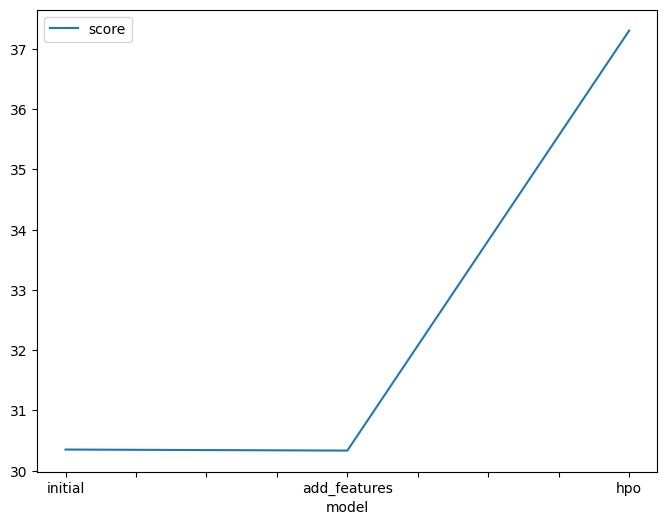

In [79]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [30.34946, 30.332326, 37.306846]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

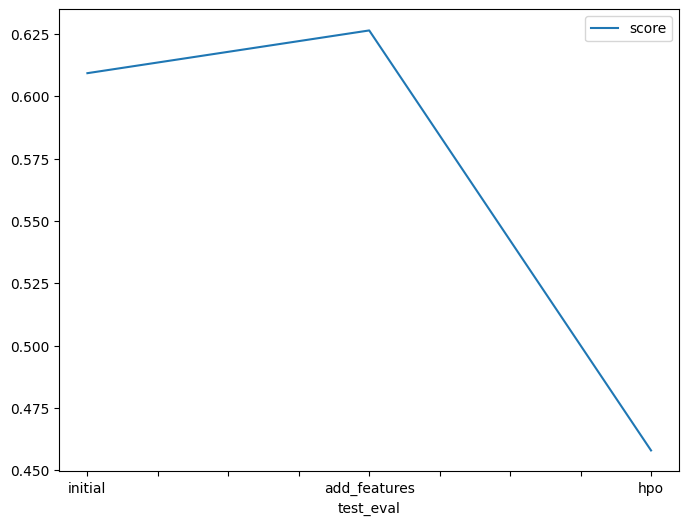

In [81]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [0.60933,0.62648, 0.45792]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [82]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "timelimit": ["time_limit = 600", "time_limit=600", "time_limit=600"],
    "presets": ["presets='best_quality'", "presets='best_quality'", "presets='best_quality'"],
    "hp-method": ["none", "problem_type = 'regression'", "tabular autogluon"],
    "score": [0.60933,0.62648, 0.45792]
})

,model,timelimit,presets,hp-method,score
0,initial,time_limit = 600,presets='best_quality',none,0.60933
1,add_features,time_limit=600,presets='best_quality',problem_type = 'regression',0.62648
2,hpo,time_limit=600,presets='best_quality',tabular autogluon,0.45792
